In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/인지프')
os.getcwd()

'/content/drive/MyDrive/인지프'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
ds = pd.read_csv('./data_by_states_20230518.csv')
ds

,ID,state,temperature_avg,CDD,GDD,HDD,temperature_max,temperature_min,precipitation,snow_depth,snow_fall,sunlight_svm,sunlight_reg,crop,productions_spring,harvested_spring,cultivated_spring,productions_winter,harvested_winter,cultivated_winter
0,1900-01,AR,44.3,0.0,54.0,634.0,69.0,13.0,2.61,1.000000,3.032499,144.000000,144.000000,Rice,421763.145486,325571.428571,325571.428571,NaN,NaN,NaN
1,1900-02,AR,40.6,0.0,24.0,676.0,72.0,5.0,4.46,0.956964,0.100000,122.000000,122.000000,Rice,421763.145486,325571.428571,325571.428571,NaN,NaN,NaN
2,1900-03,AR,52.4,7.0,166.0,392.0,86.0,22.0,1.23,0.674807,0.966744,194.000000,194.000000,Rice,421763.145486,325571.428571,325571.428571,NaN,NaN,NaN
3,1900-04,AR,63.4,66.0,418.0,108.0,86.0,33.0,3.51,0.000000,0.000000,204.000000,204.000000,Rice,421763.145486,325571.428571,325571.428571,NaN,NaN,NaN
4,1900-05,AR,70.3,186.0,637.0,14.0,88.0,44.0,4.11,0.000000,0.000000,291.000000,291.000000,Rice,421763.145486,325571.428571,325571.428571,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13279,2022-08,SD,71.4,217.0,673.0,9.0,98.0,48.0,1.59,0.000000,0.000000,318.075706,342.089693,Wheat,700388.208000,19694.664000,26358.696000,1033119.36,730000.0,830000.0
13280,2022-09,SD,64.3,92.0,435.0,107.0,95.0,31.0,0.11,0.000000,0.000000,251.065685,277.714613,Wheat,700388.208000,19694.664000,26358.696000,1033119.36,730000.0,830000.0
13281,2022-10,SD,48.1,5.0,104.0,522.0,82.0,13.0,0.10,0.000000,1.000238,215.873366,221.266503,Wheat,700388.208000,19694.664000,26358.696000,1033119.36,730000.0,830000.0
13282,2022-11,SD,28.3,0.0,11.0,1095.0,75.0,5.0,0.68,2.000000,3.300000,156.850476,145.225388,Wheat,700388.208000,19694.664000,26358.696000,1033119.36,730000.0,830000.0


In [ ]:
ds.columns

Index(['ID', 'state', 'temperature_avg', 'CDD', 'GDD', 'HDD',
       'temperature_max', 'temperature_min', 'precipitation', 'snow_depth',
       'snow_fall', 'sunlight_svm', 'sunlight_reg', 'crop',
       'productions_spring', 'harvested_spring', 'cultivated_spring',
       'productions_winter', 'harvested_winter', 'cultivated_winter'],
      dtype='object')

In [ ]:
da = pd.read_csv('./data_by_all_20230518.csv')
da

,ID,fertilizer_price_index_all,fertilizer_price_index_nitrogen,fertilizer_price_index_phosphate,oil_price,meat_total(kg/capita),meat_total_us(lb/capita),fruits(kg/capita),vegetable(kg/capita),coffee_us(gal/capita),...,population_world,population_asia_all,population_asia_east&southeast,cpi_us,gini_us,harvestedarea_rice_asia(ha),yield_rice_asia(hg/ha),production_rice_asia(ton),food_consumption_us(kcal),crop_price_us
0,1900-01,2.687540,9.292814,1.000000,7.483910,10.803852,80.945119,34.539159,11.243287,31.117215,...,3.129322e+05,5.641570e+04,9.666280e+04,8.664286,26.981158,8.572384e+07,5954.000000,6.884081e+07,3007.102825,106.0
1,1900-02,2.701685,9.297349,1.000000,7.483910,10.803852,80.945119,34.539159,11.243287,31.117215,...,3.165401e+05,5.859826e+04,9.788104e+04,8.671429,26.991586,8.576468e+07,5971.000000,6.884081e+07,3007.738058,106.0
2,1900-03,2.715830,9.301883,1.000000,7.483910,10.803852,80.945119,34.539159,11.243287,31.117215,...,3.201480e+05,6.078082e+04,9.909929e+04,8.678571,27.002013,8.580553e+07,5988.000000,6.884081e+07,3008.373292,106.0
3,1900-04,2.729975,9.306417,1.000000,7.483910,10.803852,80.945119,34.539159,11.243287,31.117215,...,3.237559e+05,6.296338e+04,1.003175e+05,8.685714,27.012441,8.584637e+07,6005.000000,6.884081e+07,3009.008525,106.0
4,1900-05,2.744120,9.310951,1.000000,7.483910,10.803852,80.945119,34.539159,11.243287,31.117215,...,3.273638e+05,6.514595e+04,1.015358e+05,8.692857,27.022868,8.588721e+07,6022.000000,6.884081e+07,3009.643758,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,2022-08,84.669442,85.799127,76.915370,319.321114,50.831212,196.200895,85.911032,99.962722,28.765632,...,7.980680e+06,4.725014e+06,2.344734e+06,296.171000,42.320014,1.458053e+08,49736.511905,7.063983e+08,3941.531195,1074.0
1472,2022-09,84.784497,85.918256,77.023596,319.610231,50.831212,196.200895,85.911032,99.962722,28.765632,...,7.986254e+06,4.727392e+06,2.345143e+06,296.808000,42.330441,1.458461e+08,49770.705357,7.070261e+08,3942.166428,1074.0
1473,2022-10,84.899552,86.037386,77.131823,319.899347,50.831212,196.200895,85.911032,99.962722,28.765632,...,7.991829e+06,4.729771e+06,2.345551e+06,298.012000,42.340869,1.458870e+08,49804.898810,7.076538e+08,3942.801662,1074.0
1474,2022-11,85.014608,86.156516,77.240050,320.188464,50.831212,196.200895,85.911032,99.962722,28.765632,...,7.997403e+06,4.732150e+06,2.345960e+06,297.711000,42.351296,1.459278e+08,49839.092262,7.082816e+08,3943.436895,1074.0


In [ ]:
da.columns

Index(['ID', 'fertilizer_price_index_all', 'fertilizer_price_index_nitrogen',
       'fertilizer_price_index_phosphate', 'oil_price',
       'meat_total(kg/capita)', 'meat_total_us(lb/capita)',
       'fruits(kg/capita)', 'vegetable(kg/capita)', 'coffee_us(gal/capita)',
       'tea_us(gal/capita)', 'cocoa_us(lb/capita)', 'co2(ppm)',
       'population_us_total', 'population_us_asian', 'population_world',
       'population_asia_all', 'population_asia_east&southeast', 'cpi_us',
       'gini_us', 'harvestedarea_rice_asia(ha)', 'yield_rice_asia(hg/ha)',
       'production_rice_asia(ton)', 'food_consumption_us(kcal)',
       'crop_price_us'],
      dtype='object')

In [ ]:
da.head(5)

,ID,fertilizer_price_index_all,fertilizer_price_index_nitrogen,fertilizer_price_index_phosphate,oil_price,meat_total(kg/capita),meat_total_us(lb/capita),fruits(kg/capita),vegetable(kg/capita),coffee_us(gal/capita),...,population_world,population_asia_all,population_asia_east&southeast,cpi_us,gini_us,harvestedarea_rice_asia(ha),yield_rice_asia(hg/ha),production_rice_asia(ton),food_consumption_us(kcal),crop_price_us
0,1900-01,2.687540,9.292814,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
1,1900-02,2.701685,9.297349,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,316540.136167,58598.259167,97881.040,8.671429,26.991586,8.576468e+07,5971.0,68840806.0,3007.738058,106.0
2,1900-03,2.715830,9.301883,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,320148.040333,60780.821333,99099.285,8.678571,27.002013,8.580553e+07,5988.0,68840806.0,3008.373292,106.0
3,1900-04,2.729975,9.306417,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,323755.944500,62963.383500,100317.530,8.685714,27.012441,8.584637e+07,6005.0,68840806.0,3009.008525,106.0
4,1900-05,2.744120,9.310951,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,327363.848667,65145.945667,101535.775,8.692857,27.022868,8.588721e+07,6022.0,68840806.0,3009.643758,106.0


### 중요한 Feature ( 곡물 생산량 예측에 필요한 데이터)
- CPI, 인구수, 유가, 일조량, CO2 농도들의 년도-월에 따른 추이 관측

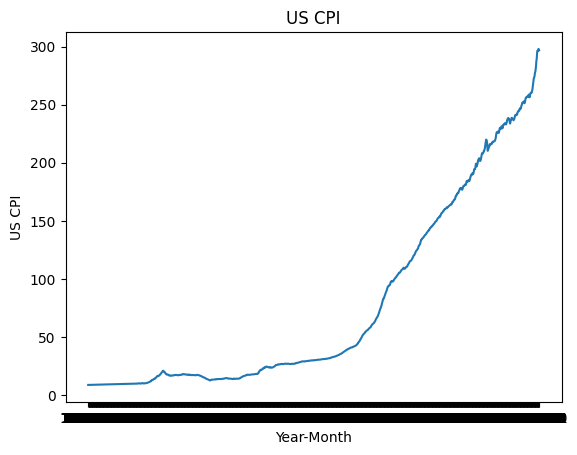

In [ ]:
x = list(da['ID'])
y = list(da['cpi_us'])

# 그래프 생성
plt.plot(x, y)

# X축 레이블 및 기울기 설정

plt.xlabel('Year-Month')

# Y축 레이블 설정
plt.ylabel('US CPI')

# 그래프 제목 설정
plt.title('US CPI')

# 그래프 출력
plt.show()

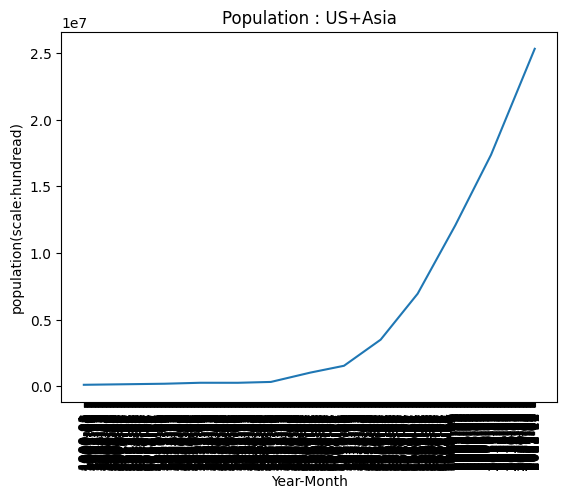

In [ ]:
x = list(da['ID'])
y = list(da['population_us_asian'])

# 그래프 생성
plt.plot(x, y)

# X축 레이블 및 기울기 설정
plt.xticks(rotation=90)
plt.xlabel('Year-Month')

# Y축 레이블 설정
plt.ylabel('population(scale:hundread)')

# 그래프 제목 설정
plt.title('Population : US+Asia')

# 그래프 출력
plt.show()

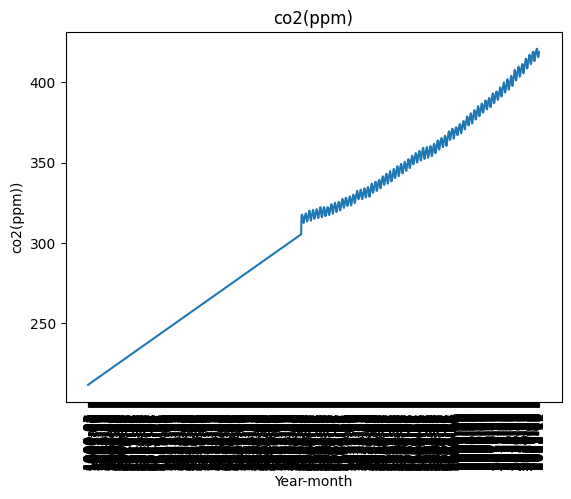

In [ ]:
x = list(da['ID'])
y = list(da['co2(ppm)'])

# 그래프 생성
plt.plot(x, y)

# X축 레이블 및 기울기 설정
plt.xticks(rotation=90)
plt.xlabel('Year-month')

# Y축 레이블 설정
plt.ylabel('co2(ppm))')

# 그래프 제목 설정
plt.title('co2(ppm)')

# 그래프 출력
plt.show()

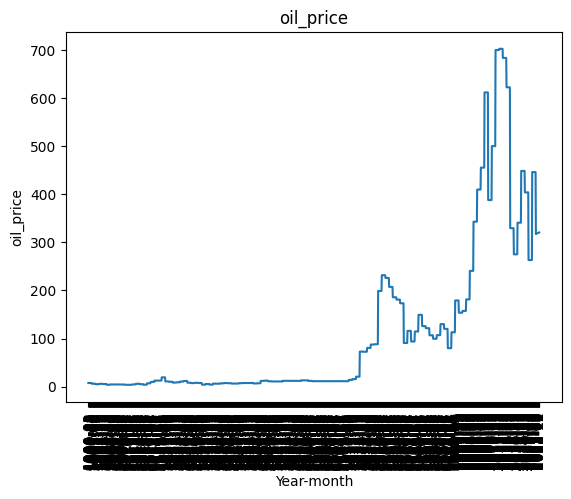

In [ ]:
x = list(da['ID'])
y = list(da['oil_price'])

# 그래프 생성
plt.plot(x, y)

# X축 레이블 및 기울기 설정
plt.xticks(rotation=90)
plt.xlabel('Year-month')

# Y축 레이블 설정
plt.ylabel('oil_price')

# 그래프 제목 설정
plt.title('oil_price')

# 그래프 출력
plt.show()

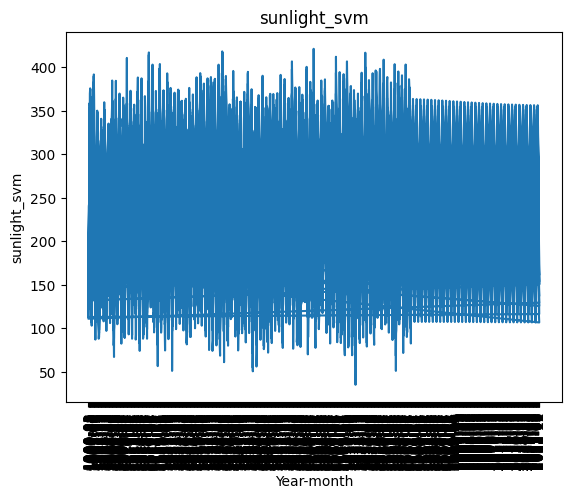

In [ ]:
x = list(ds['ID'])
y = list(ds['sunlight_svm'])

# 그래프 생성
plt.plot(x, y)

# X축 레이블 및 기울기 설정
plt.xticks(rotation=90)
plt.xlabel('Year-month')

# Y축 레이블 설정
plt.ylabel('sunlight_svm')

# 그래프 제목 설정
plt.title('sunlight_svm')

# 그래프 출력
plt.show()

### 미국 주별과 전세계 데이터를 담고있는 두 데이터 셋을 곡물을 기준으로 분리


In [ ]:
# ID를 기준으로 dataframe merge
df=pd.merge(ds,da,on='ID')

In [ ]:
df.head()

,ID,state,temperature_avg,CDD,GDD,HDD,temperature_max,temperature_min,precipitation,snow_depth,...,population_world,population_asia_all,population_asia_east&southeast,cpi_us,gini_us,harvestedarea_rice_asia(ha),yield_rice_asia(hg/ha),production_rice_asia(ton),food_consumption_us(kcal),crop_price_us
0,1900-01,AR,44.3,0.0,54.0,634.0,69.0,13.0,2.61,1.000000,...,312932.232,56415.697,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
1,1900-01,CA,47.3,0.0,27.0,542.0,60.0,36.0,3.54,0.000000,...,312932.232,56415.697,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
2,1900-01,IA,27.6,0.0,0.0,1153.0,54.0,-10.0,0.20,5.822278,...,312932.232,56415.697,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
3,1900-01,IL,28.7,0.0,0.0,1117.0,56.0,-8.0,1.21,5.911620,...,312932.232,56415.697,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
4,1900-01,LA,48.2,0.0,104.0,513.0,74.0,17.0,3.87,0.637202,...,312932.232,56415.697,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0


In [ ]:
# 작물이름에 따라 groupby
grouped = df.groupby('crop')

In [ ]:
group_dict = {}  
for group_id, group_df in grouped:
    if group_id!='Wheat':
        print(group_id)
        group_df=group_df.drop(labels=['productions_winter','harvested_winter','cultivated_winter'],axis=1)
        group_df=group_df.rename(columns={'productions_spring':'productions','harvested_spring':'harvested','cultivated_spring':'cultivated'})
        group_dict[group_id]=group_df
    else:
        print(group_id)
        winter=group_df.copy()
        winter=winter.drop(labels=['productions_spring', 'harvested_spring', 'cultivated_spring'],axis=1)
        winter = winter.rename(columns={'productions_winter': 'productions', 'harvested_winter': 'harvested','cultivated_winter':'cultivated'})

        spring=group_df.copy()
        spring=spring.drop(labels=['productions_winter', 'harvested_winter', 'cultivated_winter'],axis=1)
        spring = spring.rename(columns={'productions_spring': 'productions', 'harvested_spring': 'harvested','cultivated_spring':'cultivated'})

        group_dict['Winter_wheat']=winter
        group_dict['Spring_wheat']=spring

Corn
Rice
Wheat


In [ ]:
data_corn=group_dict['Corn']
data_corn.to_csv('./data_corn.csv', index=False)

In [ ]:
data_rice=group_dict['Rice']
data_rice.to_csv('./data_rice.csv', index=False)

In [ ]:
data_winter_wheat=group_dict['Winter_wheat']
data_winter_wheat.to_csv('./data_winter_wheat.csv', index=False)

In [ ]:
data_spring_wheat=group_dict['Spring_wheat']
data_spring_wheat.to_csv('./data_spring_wheat.csv', index=False)


In [ ]:
data_corn=pd.read_csv("data_corn.csv")
data_corn.head()

,ID,state,temperature_avg,CDD,GDD,HDD,temperature_max,temperature_min,precipitation,snow_depth,...,population_world,population_asia_all,population_asia_east&southeast,cpi_us,gini_us,harvestedarea_rice_asia(ha),yield_rice_asia(hg/ha),production_rice_asia(ton),food_consumption_us(kcal),crop_price_us
0,1900-01,IA,27.6,0.0,0.0,1153.0,54.0,-10.0,0.20,5.822278,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
1,1900-01,IL,28.7,0.0,0.0,1117.0,56.0,-8.0,1.21,5.911620,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
2,1900-01,NE,31.4,0.0,0.0,1037.0,63.0,-5.0,0.06,3.000000,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
3,1900-02,IA,17.1,0.0,0.0,1336.0,45.0,-10.0,0.50,2.652787,...,316540.136167,58598.259167,97881.040,8.671429,26.991586,8.576468e+07,5971.0,68840806.0,3007.738058,106.0
4,1900-02,IL,20.1,0.0,0.0,1249.0,62.0,-9.0,3.52,6.320911,...,316540.136167,58598.259167,97881.040,8.671429,26.991586,8.576468e+07,5971.0,68840806.0,3007.738058,106.0


In [ ]:
data_rice=pd.read_csv("data_rice.csv")
data_rice.head()

,ID,state,temperature_avg,CDD,GDD,HDD,temperature_max,temperature_min,precipitation,snow_depth,...,population_world,population_asia_all,population_asia_east&southeast,cpi_us,gini_us,harvestedarea_rice_asia(ha),yield_rice_asia(hg/ha),production_rice_asia(ton),food_consumption_us(kcal),crop_price_us
0,1900-01,AR,44.3,0.0,54.0,634.0,69.0,13.0,2.61,1.000000,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
1,1900-01,CA,47.3,0.0,27.0,542.0,60.0,36.0,3.54,0.000000,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
2,1900-01,LA,48.2,0.0,104.0,513.0,74.0,17.0,3.87,0.637202,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
3,1900-02,AR,40.6,0.0,24.0,676.0,72.0,5.0,4.46,0.956964,...,316540.136167,58598.259167,97881.040,8.671429,26.991586,8.576468e+07,5971.0,68840806.0,3007.738058,106.0
4,1900-02,CA,51.7,0.0,76.0,367.0,68.0,35.0,0.32,0.000000,...,316540.136167,58598.259167,97881.040,8.671429,26.991586,8.576468e+07,5971.0,68840806.0,3007.738058,106.0


In [ ]:
data_winter_wheat=pd.read_csv('data_winter_wheat.csv')
data_winter_wheat.head()

,ID,state,temperature_avg,CDD,GDD,HDD,temperature_max,temperature_min,precipitation,snow_depth,...,population_world,population_asia_all,population_asia_east&southeast,cpi_us,gini_us,harvestedarea_rice_asia(ha),yield_rice_asia(hg/ha),production_rice_asia(ton),food_consumption_us(kcal),crop_price_us
0,1900-01,MN,21.300000,0.0,0.0,1345.000000,51.0,-15.0,0.620000,3.000000,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
1,1900-01,ND,18.600000,0.0,0.0,1431.000000,51.0,-20.0,0.280000,6.964656,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
2,1900-01,SD,9.608477,0.0,0.0,1684.174214,58.0,-20.0,0.915679,5.046114,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
3,1900-02,MN,8.600000,0.0,0.0,1569.000000,37.0,-17.0,0.310000,6.000000,...,316540.136167,58598.259167,97881.040,8.671429,26.991586,8.576468e+07,5971.0,68840806.0,3007.738058,106.0
4,1900-02,ND,3.700000,0.0,0.0,1710.000000,44.0,-33.0,0.300000,9.776368,...,316540.136167,58598.259167,97881.040,8.671429,26.991586,8.576468e+07,5971.0,68840806.0,3007.738058,106.0


In [ ]:
data_spring_wheat=pd.read_csv('data_spring_wheat.csv')
data_spring_wheat.head()

,ID,state,temperature_avg,CDD,GDD,HDD,temperature_max,temperature_min,precipitation,snow_depth,...,population_world,population_asia_all,population_asia_east&southeast,cpi_us,gini_us,harvestedarea_rice_asia(ha),yield_rice_asia(hg/ha),production_rice_asia(ton),food_consumption_us(kcal),crop_price_us
0,1900-01,MN,21.300000,0.0,0.0,1345.000000,51.0,-15.0,0.620000,3.000000,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
1,1900-01,ND,18.600000,0.0,0.0,1431.000000,51.0,-20.0,0.280000,6.964656,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
2,1900-01,SD,9.608477,0.0,0.0,1684.174214,58.0,-20.0,0.915679,5.046114,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
3,1900-02,MN,8.600000,0.0,0.0,1569.000000,37.0,-17.0,0.310000,6.000000,...,316540.136167,58598.259167,97881.040,8.671429,26.991586,8.576468e+07,5971.0,68840806.0,3007.738058,106.0
4,1900-02,ND,3.700000,0.0,0.0,1710.000000,44.0,-33.0,0.300000,9.776368,...,316540.136167,58598.259167,97881.040,8.671429,26.991586,8.576468e+07,5971.0,68840806.0,3007.738058,106.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-61-85814bda1e3b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['productions'].sort_values(ascending=False)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'productions'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-61-85814bda1e3b>", line 1, in <cell line: 1>
    df.corr()['productions'].sort_values(ascending=False)
  File 

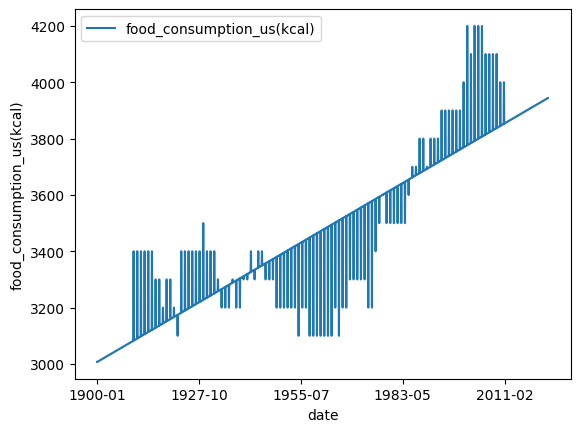

In [ ]:
Food_consumption=data_corn[['ID','food_consumption_us(kcal)']]
Food_consumption.set_index(data_corn['ID']).plot()
plt.xlabel('date')
plt.ylabel('food_consumption_us(kcal)')
plt.show()

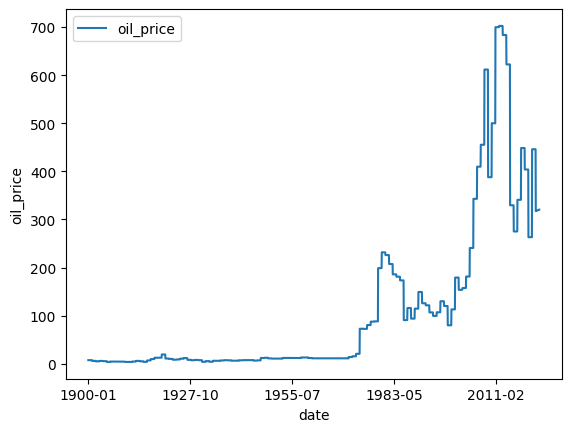

In [ ]:
oil=data_corn[['ID','oil_price']]
oil.set_index(data_corn['ID']).plot()
plt.xlabel('date')
plt.ylabel('oil_price')
plt.show()

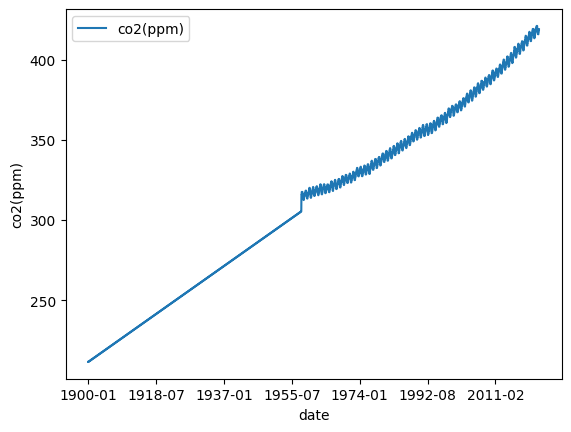

In [ ]:
co2 = df[['ID', 'co2(ppm)']]
co2.set_index(df['ID']).plot()
plt.xlabel('date')
plt.ylabel('co2(ppm)')
plt.show()

In [ ]:
sun = df[['ID', 'sunlight_svm wiwthou']]
sun.set_index(df['ID']).plot()
plt.xlabel('date')
plt.ylabel('sunlight_svm')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-739b28c89d78>", line 1, in <cell line: 1>
    sun = df[['ID', 'sunlight_svm without state']]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 3813, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 6070, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 6133, in _raise_if_missing
    raise KeyError(f"{not_found} not in index")
KeyError: "['sunlight_svm without state'] not in index"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dis